In [1]:
import pandas as pd
import numpy as np
import os
import sys
import scanpy as sc
import scipy
import time
import gget
from sklearn.decomposition import PCA
from kneed import KneeLocator
from importlib import reload

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib.patheffects as pe

"""WARNING: disabling future warnings"""
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # and to omit tensorflow logging

""" Increase scanpy output"""
sc.settings.verbosity = 3

# local 
import utils as ut
reload(ut)

<module 'utils' from '/home/cstansbu/git_repositories/MC3R/notebooks/utils.py'>

In [2]:
fullpath = "/nfs/turbo/umms-indikar/shared/projects/MC3R/processed_data/all_clustered.h5ad"
raw = sc.read(fullpath)
pdf = raw.copy()
pdf

AnnData object with n_obs × n_vars = 42937 × 25060
    obs: 'batch', 'reference_embedding_C7_named', 'reference_embedding_C25_named', 'C25_named', 'C7_named', 'reference_embedding_C7_named_clean', 'reference_embedding_C25_named_clean', 'C25_named_clean', 'C7_named_clean', 'UMAP1', 'UMAP2', 'Diet', 'Sex', 'broad_type', 'n_genes', 'color', 'leiden', 'cluster_num', 'Cluster', 'cluster_cat', 'U1', 'U2', 'cell_type'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Cluster', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

cell_type
Neurons             33647
Oligodendrocytes     4026
Astrocytes           2121
OPC                   911
Fibroblasts           840
Microglia             828
Ependymal Cells       564
Name: count, dtype: int64
saved: /nfs/turbo/umms-indikar/shared/projects/MC3R/analysis_files/figures/cluster_umap.png


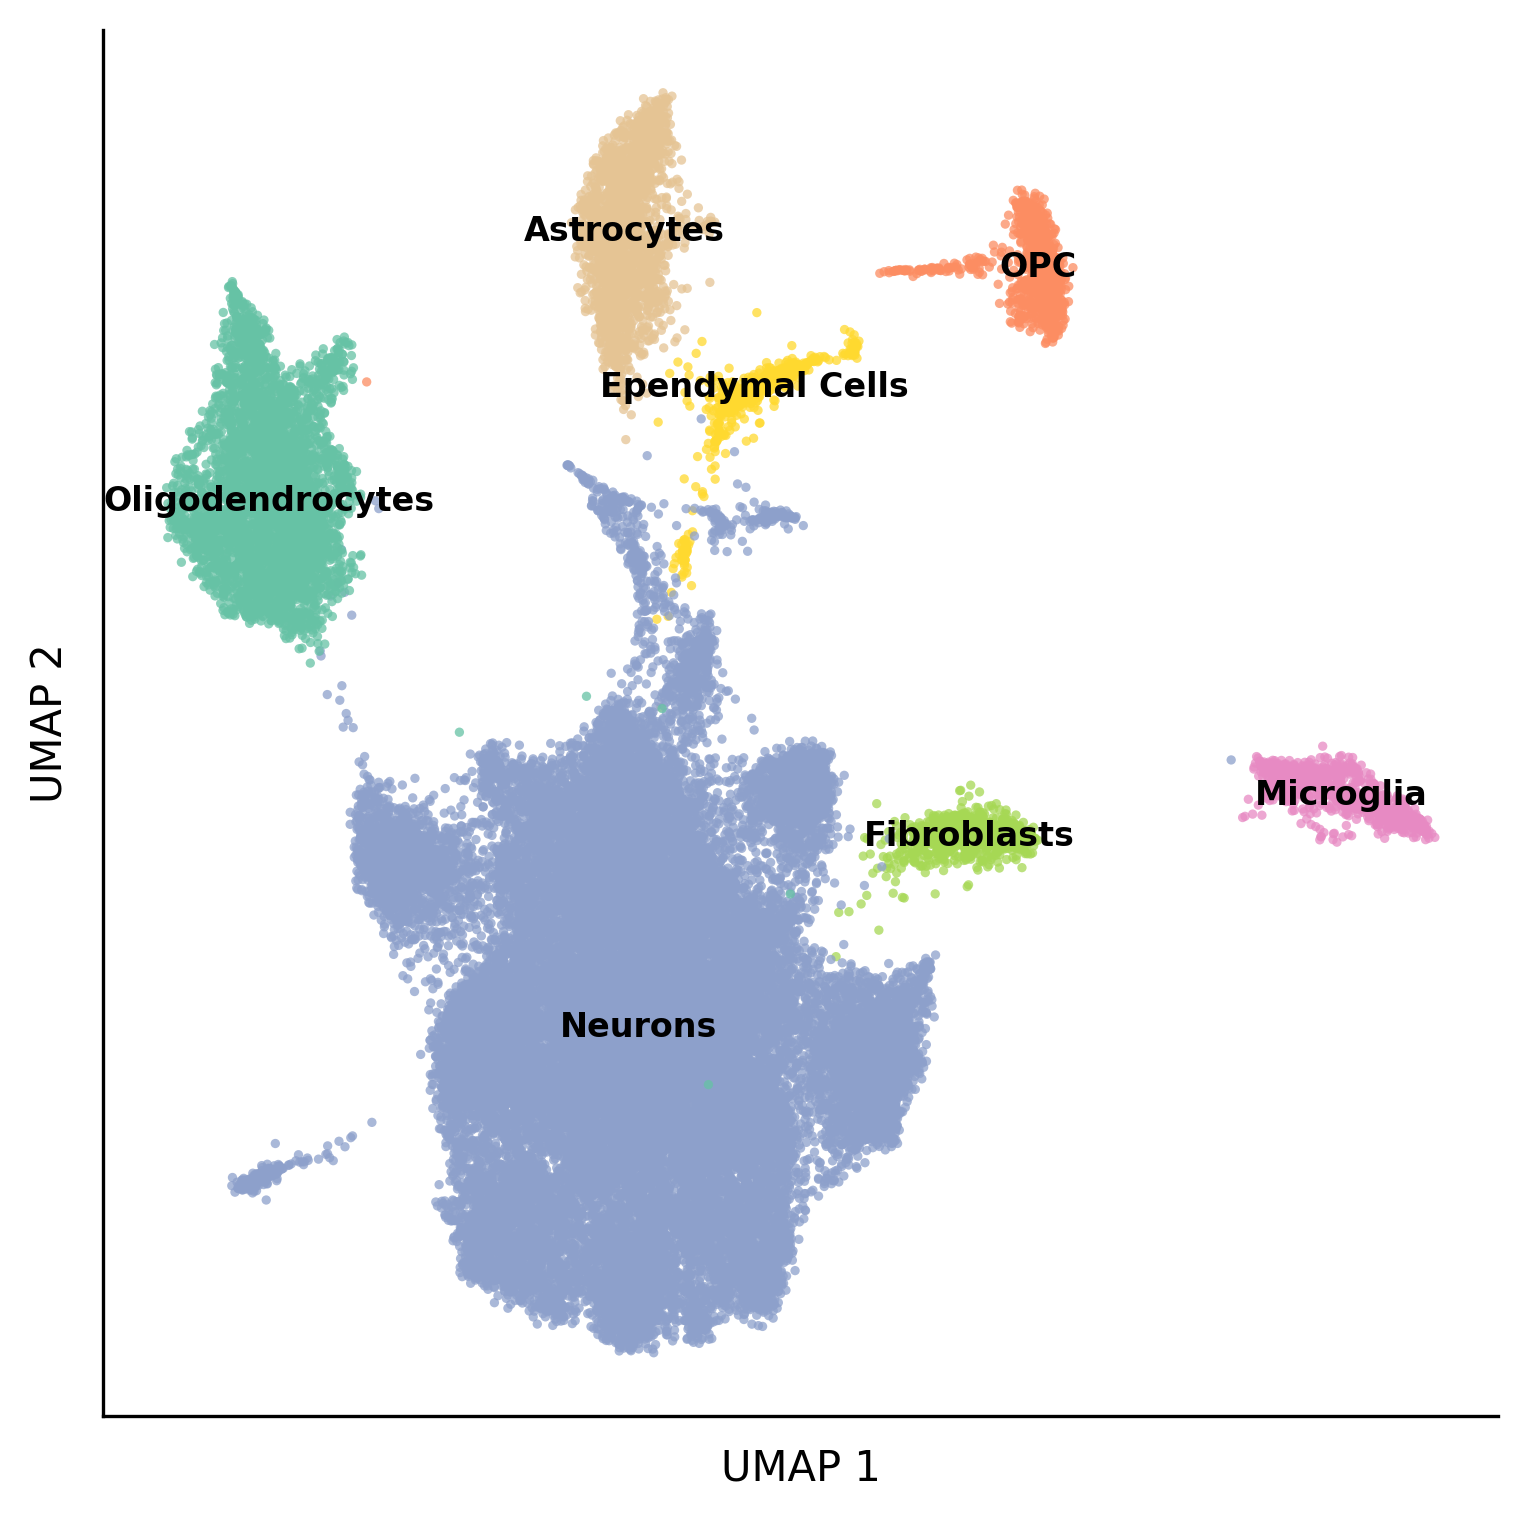

In [3]:
cluster_map = {
    "C1" : "Neurons",
    "C2" : "Oligodendrocytes",
    "C3" : "Neurons",
    "C4" : "Astrocytes",
    "C5" : "Neurons",
    "C6" : "Neurons",
    "C7" : "OPC",
    "C8" : "Neurons",
    "C9" : "Fibroblasts",
    "C10" : "Microglia",
    "C11" : "Ependymal Cells",
    "C12" : "Neurons",
}

pdf.obs['cell_type'] = pdf.obs['Cluster'].map(cluster_map)
print(pdf.obs['cell_type'].value_counts())


plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 6, 6

# sort the data frame
pdx = pdf.obs.copy()
pdx = pdx.sort_values(by='cell_type')


sns.scatterplot(data=pdx,
                x='U1',
                y='U2',
                hue='cell_type',
                palette='Set2_r',
                s=5,
                alpha=0.75,
                ec='none'
        )

sns.despine()
plt.xticks([])
plt.yticks([])

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")

# label on data
ax = plt.gca()

all_pos = (
        pdx.groupby('cell_type')[['U1', 'U2']]
        .median()
        .sort_index()
    )

for label, x_pos, y_pos in all_pos.itertuples():
    ax.text(
        x_pos,
        y_pos,
        label,
        weight='bold',
        verticalalignment="center",
        horizontalalignment="center",
        fontsize='8',
    )

plt.gca().legend().remove()

outpath = "/nfs/turbo/umms-indikar/shared/projects/MC3R/analysis_files/figures/cluster_umap.png"
plt.savefig(outpath)
print(f"saved: {outpath}")